# Quick Hull

Enter no of points to enter: 6
Enter value of x1: 3
Enter value of y1: 2
Enter value of x2: 7
Enter value of y2: 5
Enter value of x3: 1
Enter value of y3: 1
Enter value of x4: 7
Enter value of y4: 3
Enter value of x5: 7
Enter value of y5: 8
Enter value of x6: 4
Enter value of y6: 0


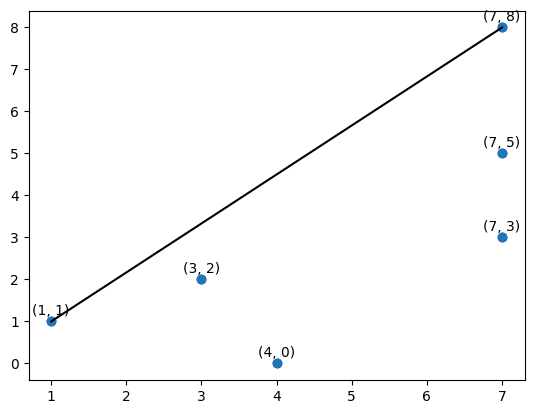

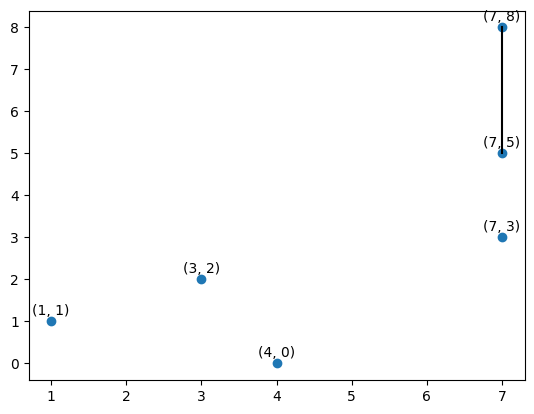

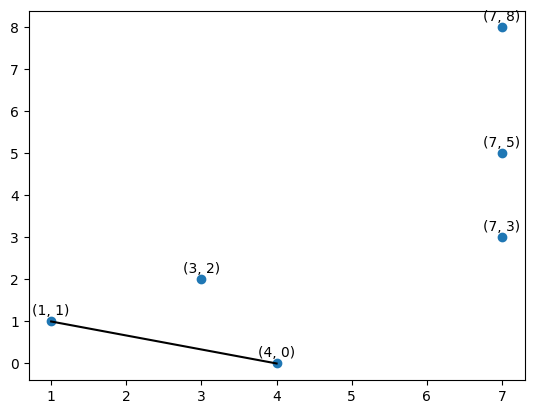

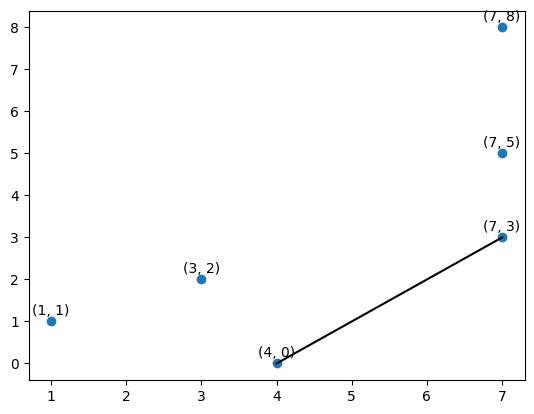

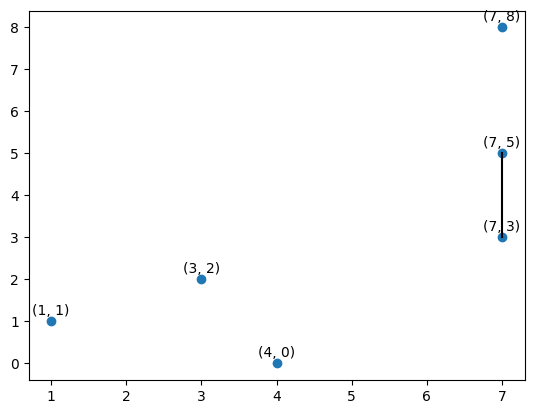

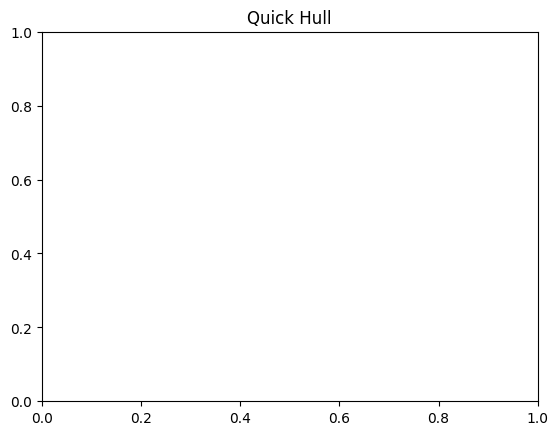

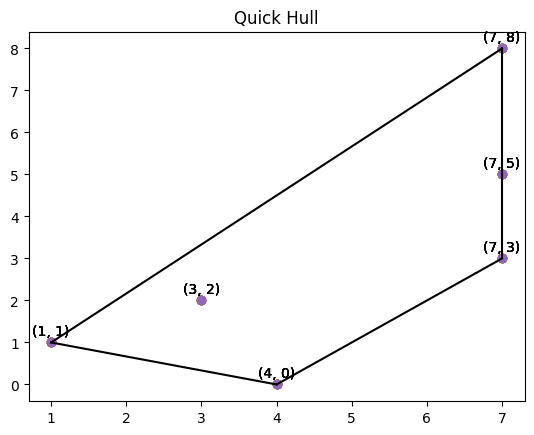

In [ ]:
import random
import math
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1

class Line:
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2

    def draw(self, ax, points):
      x_values = [self.p1[0], self.p2[0]]
      y_values = [self.p1[1], self.p2[1]]
      ax.plot(x_values, y_values, color='black')

      x_coords = [point[0] for point in points]
      y_coords = [point[1] for point in points]
      ax.scatter(x_coords, y_coords, label='All Points', marker='o')

      for j, txt in enumerate(points):
          ax.annotate(f'({txt[0]}, {txt[1]})', (txt[0], txt[1]), textcoords="offset points", xytext=(0, 5), ha='center')


    def draw_hull(self, plt_module, points):
        x_coords = [point[0] for point in points]
        y_coords = [point[1] for point in points]

        plt_module.scatter(x_coords, y_coords, label='All Points', marker='o')

        for i, txt in enumerate(points):
            plt_module.annotate(f'({txt[0]}, {txt[1]})', (txt[0], txt[1]), textcoords="offset points", xytext=(0, 5), ha='center')

        x_values = [self.p1[0], self.p2[0]]
        y_values = [self.p1[1], self.p2[1]]
        plt_module.plot(x_values, y_values, color='black')

        plt_module.pause(0.5)
        plt_module.cla()

def point_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def quick_hull(points):
    def find_side(p1, p2, p):
        val = (p[1] - p1[1]) * (p2[0] - p1[0]) - (p2[1] - p1[1]) * (p[0] - p1[0])
        if val > 0:
            return 1
        if val < 0:
            return -1
        return 0

    def line_dist(p1, p2, p):
        return abs((p[1] - p1[1]) * (p2[0] - p1[0]) - (p2[1] - p1[1]) * (p[0] - p1[0]))

    def quick_hull_recursive(a, n, p1, p2, side):
        nonlocal hull
        ind = -1
        max_dist = 0

        for i in range(n):
            temp = line_dist(p1, p2, a[i])
            if (find_side(p1, p2, a[i]) == side) and (temp > max_dist):
                ind = i
                max_dist = temp

        if ind == -1:
            hull.append(p1)
            hull.append(p2)
            return

        quick_hull_recursive(a, n, a[ind], p1, -find_side(a[ind], p1, p2))
        quick_hull_recursive(a, n, a[ind], p2, -find_side(a[ind], p2, p1))

    # Create a single subplot for both points and convex hull
    fig, ax = plt1.subplots()

    # Scatter the points on the graph
    x, y = zip(*points)
    ax.scatter(x, y, color='blue')

    # Finding the point with minimum and maximum x-coordinate
    min_x = 0
    max_x = 0
    for i in range(1, len(points)):
        if points[i][0] < points[min_x][0]:
            min_x = i
        if points[i][0] > points[max_x][0]:
            max_x = i

    hull = []  # Initialize the hull list
    # Recursively find convex hull points on one side of the line joining points[min_x] and points[max_x]
    quick_hull_recursive(points, len(points), points[min_x], points[max_x], 1)

    # Recursively find convex hull points on the other side of the line
    quick_hull_recursive(points, len(points), points[min_x], points[max_x], -1)


    for i in range(0, len(hull), 2):
        line1 = Line(hull[i], hull[i + 1])
        line1.draw_hull(plt, points)

    plt.title("Quick Hull")
    plt.show()
    # Draw the lines forming the convex hull
    for i in range(0, len(hull), 2):
        line = Line(hull[i], hull[i + 1])
        line.draw(plt1,points)

    # Show the plot with points and convex hull
    plt1.title("Quick Hull")
    plt1.show()

# Call the modified quick_hull function

def call_quick_hull():
  point_vector = []
  n = int(input("Enter no of points to enter: "))
  for i in range(n):
    x = int(input(f"Enter value of x{i + 1}: "))
    y = int(input(f"Enter value of y{i + 1}: "))
    point_vector.append((x, y))
  # point_vector = [
  #     (1, 3), (5, 4), (1, 6), (3, 8),
  #     (2, 2), (7, 5), (9, 1), (4, 7),
  #     (8, 9), (6, 3), (2, 9), (5, 1),
  #     (3, 5), (9, 7), (4, 2), (1, 8),
  #     (7, 2), (6, 9), (8, 4), (10, 10)
  # ]
  quick_hull(point_vector)

if __name__ == "__main__":
  call_quick_hull()


# Brute Force

Enter no of points to enter: 6
Enter value of x1: 3
Enter value of y1: 1
Enter value of x2: 8
Enter value of y2: 2
Enter value of x3: 0
Enter value of y3: 0
Enter value of x4: 9
Enter value of y4: 1
Enter value of x5: 5
Enter value of y5: 1
Enter value of x6: 2
Enter value of y6: 6


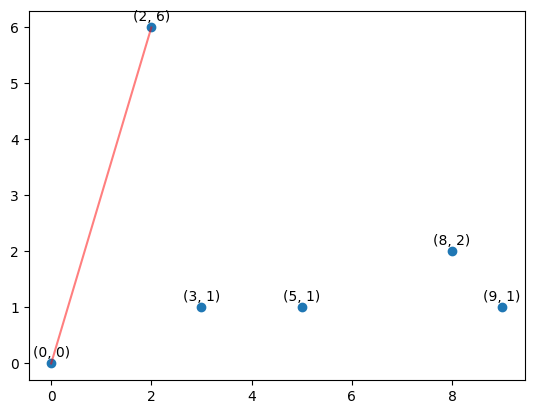

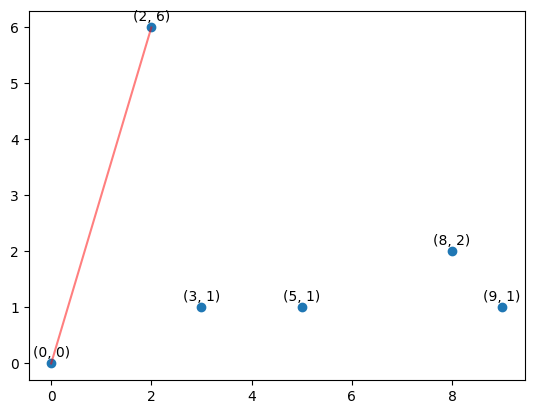

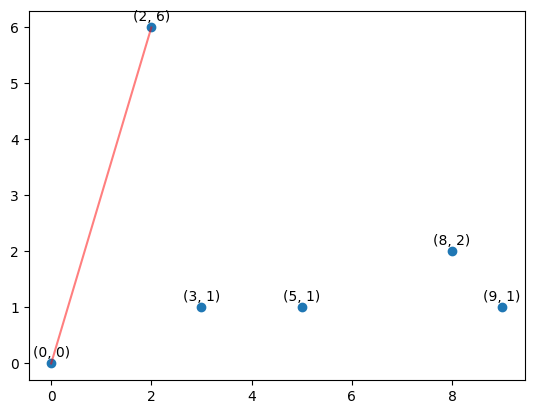

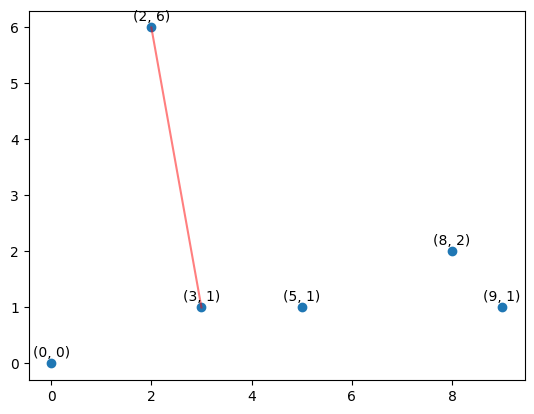

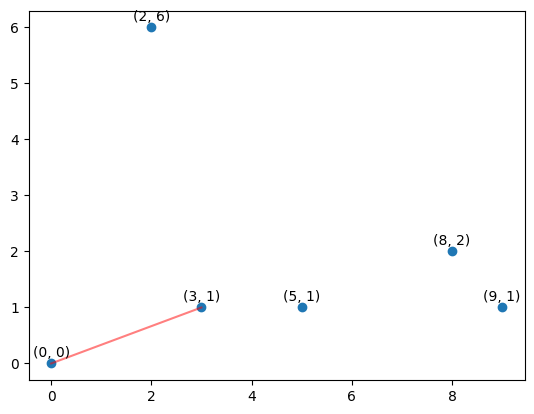

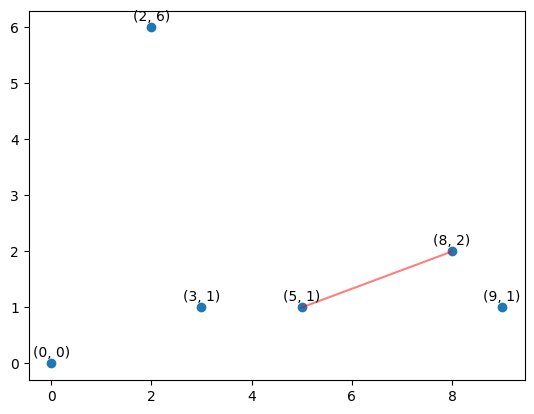

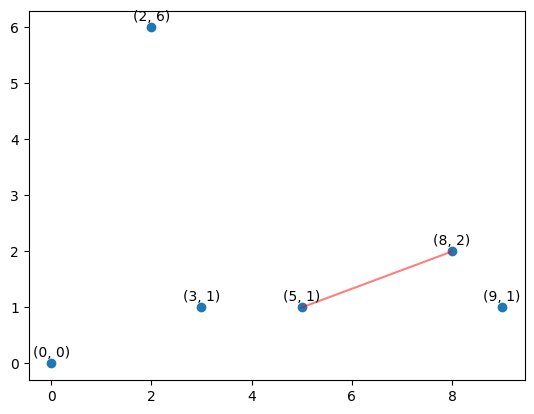

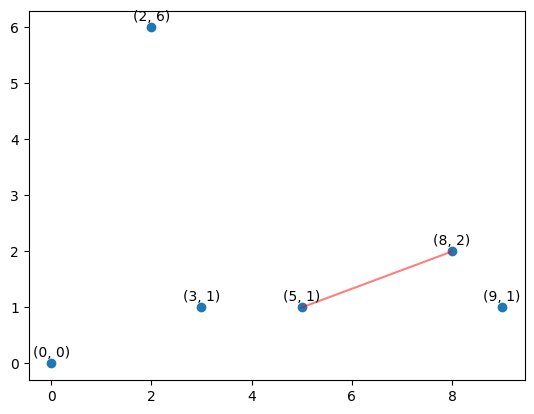

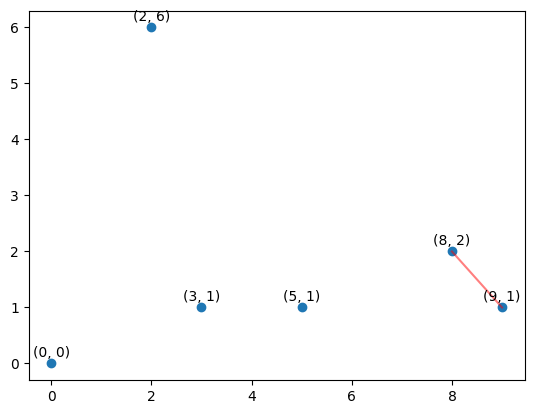

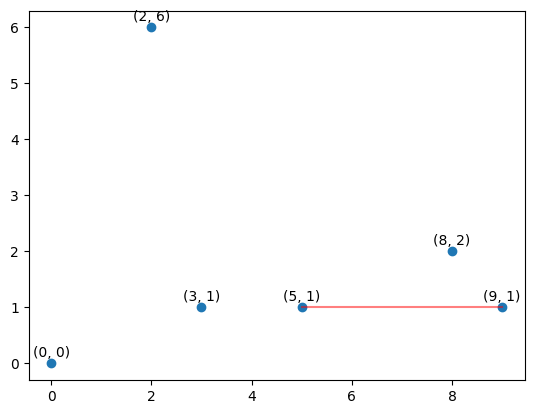

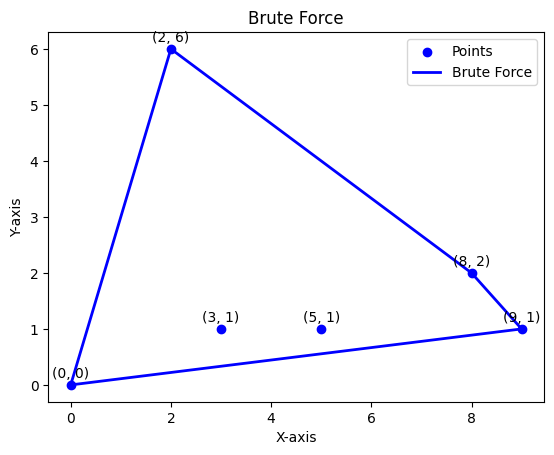

In [ ]:
9import matplotlib.pyplot as plt
from functools import cmp_to_key

# Global variable to store the center of the polygon
mid = [0, 0]

def quad(p):
    if p[0] >= 0 and p[1] >= 0:
        return 1
    if p[0] <= 0 and p[1] >= 0:
        return 2
    if p[0] <= 0 and p[1] <= 0:
        return 3
    return 4

def orientation(a, b, c):
    res = (b[1] - a[1]) * (c[0] - b[0]) - (c[1] - b[1]) * (b[0] - a[0])
    if res == 0:
        return 0
    if res > 0:
        return 1
    return -1

def compare(p1, q1):
    p = [p1[0] - mid[0], p1[1] - mid[1]]
    q = [q1[0] - mid[0], q1[1] - mid[1]]
    one = quad(p)
    two = quad(q)

    if one != two:
        if one < two:
            return -1
        return 1
    if p[1] * q[0] < q[1] * p[0]:
        return -1
    return 1

def merger(a, b):
    n1, n2 = len(a), len(b)
    ia, ib = 0, 0

    for i in range(1, n1):
        if a[i][0] > a[ia][0]:
            ia = i

    for i in range(1, n2):
        if b[i][0] < b[ib][0]:
            ib = i

    inda, indb = ia, ib
    done = 0
    while not done:
        done = 1
        while orientation(b[indb], a[inda], a[(inda + 1) % n1]) >= 0:
            inda = (inda + 1) % n1

        while orientation(a[inda], b[indb], b[(n2 + indb - 1) % n2]) <= 0:
            indb = (indb - 1) % n2
            done = 0

    uppera, upperb = inda, indb
    inda, indb = ia, ib
    done = 0
    while not done:
        done = 1
        while orientation(a[inda], b[indb], b[(indb + 1) % n2]) >= 0:
            indb = (indb + 1) % n2

        while orientation(b[indb], a[inda], a[(n1 + inda - 1) % n1]) <= 0:
            inda = (inda - 1) % n1
            done = 0

    ret = []
    lowera, lowerb = inda, indb
    ind = uppera
    ret.append(a[uppera])
    while ind != lowera:
        ind = (ind + 1) % n1
        ret.append(a[ind])

    ind = lowerb
    ret.append(b[lowerb])
    while ind != upperb:
        ind = (ind + 1) % n2
        ret.append(b[ind])
    return ret

def bruteHull(a):
    global mid
    s = set()
    for i in range(len(a)):
        for j in range(i + 1, len(a)):
            x1, x2 = a[i][0], a[j][0]
            y1, y2 = a[i][1], a[j][1]
            a1, b1, c1 = y1 - y2, x2 - x1, x1 * y2 - y1 * x2
            pos, neg = 0, 0
            for k in range(len(a)):
                if (k == i) or (k == j) or (a1 * a[k][0] + b1 * a[k][1] + c1 <= 0):
                    neg += 1
                if (k == i) or (k == j) or (a1 * a[k][0] + b1 * a[k][1] + c1 >= 0):
                    pos += 1
            if pos == len(a) or neg == len(a):
                s.add(tuple(a[i]))
                s.add(tuple(a[j]))

    ret = []
    for x in s:
        ret.append(list(x))

    mid = [0, 0]
    n = len(ret)
    for i in range(n):
        mid[0] += ret[i][0]
        mid[1] += ret[i][1]
        ret[i][0] *= n
        ret[i][1] *= n
    ret = sorted(ret, key=cmp_to_key(compare))
    for i in range(n):
        ret[i] = [ret[i][0] / n, ret[i][1] / n]
    return ret

def draw_outline(hull_points, points):
    for i in range(len(hull_points)):
        x_coords = [point[0] for point in points]
        y_coords = [point[1] for point in points]
        plt.scatter(x_coords, y_coords, label='All Points', marker='o')

        for j, txt in enumerate(points):
            plt.annotate(f'({txt[0]}, {txt[1]})', (txt[0], txt[1]), textcoords="offset points", xytext=(0, 5), ha='center')

        plt.plot([hull_points[i][0], hull_points[(i + 1) % len(hull_points)][0]],
                 [hull_points[i][1], hull_points[(i + 1) % len(hull_points)][1]],
                 linestyle='-', color='r', alpha=0.5)
        plt.pause(0.5)

        plt.cla()


def divide(a):
    if len(a) <= 5:
        return bruteHull(a)

    left, right = [], []
    start = int(len(a) / 2)
    for i in range(start):
        left.append(a[i])
        if(len(left) >= 2):
          draw_outline(left,a);


    for i in range(start, len(a)):
        right.append(a[i])
        if(len(right) >= 2):
          draw_outline(right,a);

    left_hull = divide(left)
    right_hull = divide(right)

    return merger(left_hull, right_hull)

# Plotting function

def plot_convex_hull(points, hull):
    x = [point[0] for point in points]
    y = [point[1] for point in points]

    hull_x = [point[0] for point in hull]
    hull_y = [point[1] for point in hull]

    plt.scatter(x, y, color='blue', label='Points')
    for i, txt in enumerate(points):
        plt.annotate(f'({txt[0]}, {txt[1]})', (txt[0], txt[1]), textcoords="offset points", xytext=(0, 5), ha='center')
    plt.plot(hull_x + [hull_x[0]], hull_y + [hull_y[0]], color='b', linestyle='-', linewidth=2, label='Brute Force')

    plt.title('Brute Force')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()


# Driver Code
def brute_force():
    a = []
    n = int(input("Enter no of points to enter: "))
    for i in range(n):
      x = int(input(f"Enter value of x{i + 1}: "))
      y = int(input(f"Enter value of y{i + 1}: "))
      a.append([x, y])
    # a.append([0, 0])
    # a.append([1, -4])
    # a.append([-1, -5])
    # a.append([-5, -3])
    # a.append([-3, -1])
    # a.append([-1, -3])
    # a.append([-2, -2])
    # a.append([-1, -1])
    # a.append([-2, -1])
    # a.append([-1, 1])

    n = len(a)
    a.sort()
    ans = divide(a)

    # Plotting the convex hull
    plot_convex_hull(a, ans)

if __name__ == '__main__':
  brute_force()

# Jarvis March

Enter no of points to enter: 4
Enter value of x1: 9
Enter value of y1: 1
Enter value of x2: 2
Enter value of y2: 4
Enter value of x3: 0
Enter value of y3: 1
Enter value of x4: 2
Enter value of y4: 4


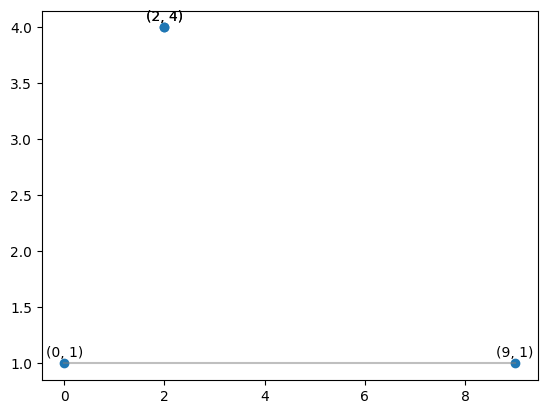

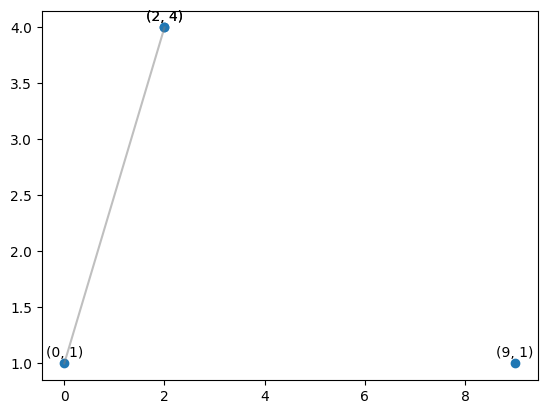

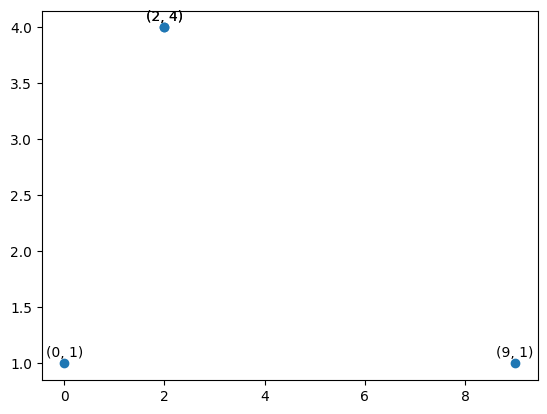

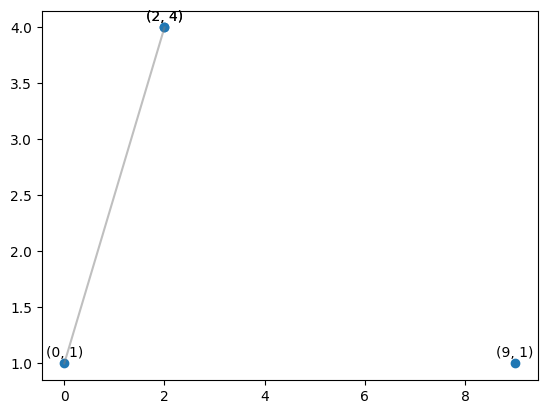

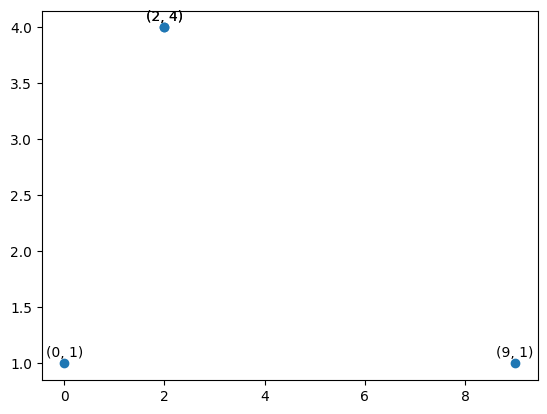

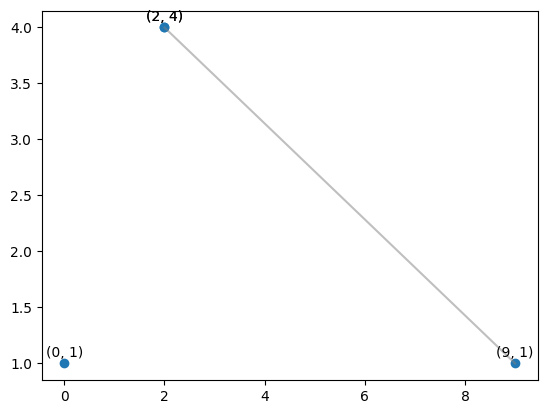

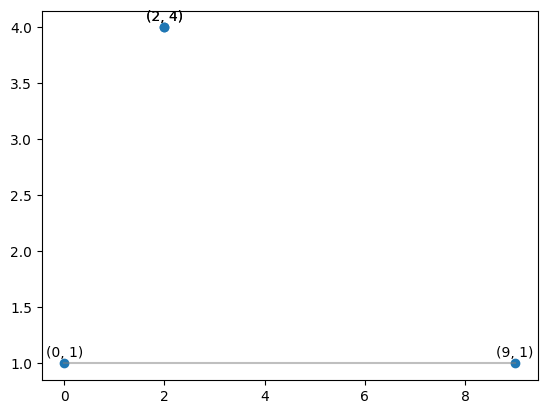

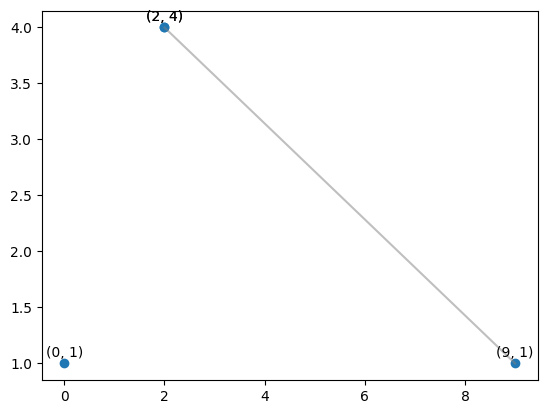

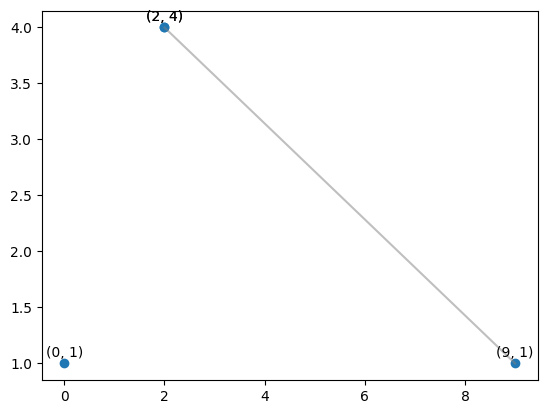

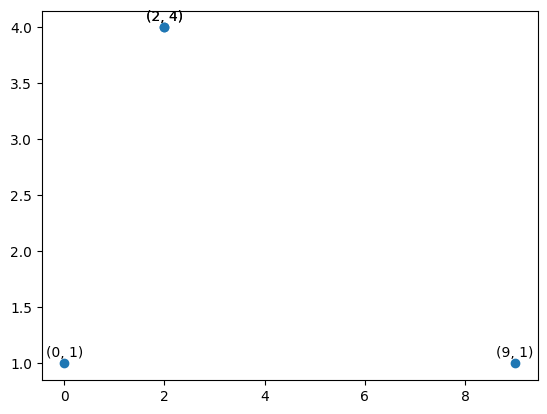

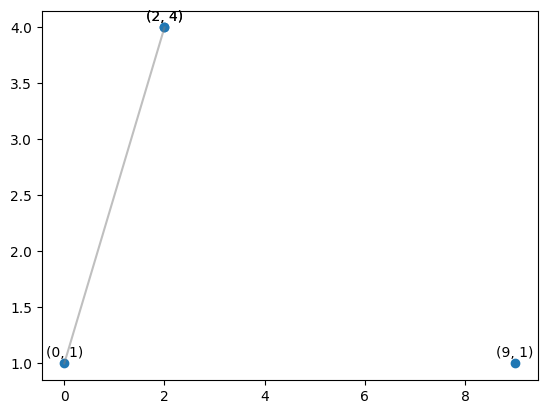

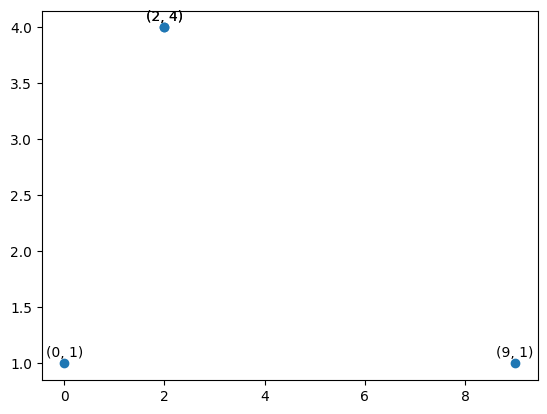

(0,1)
(9,1)
(2,4)


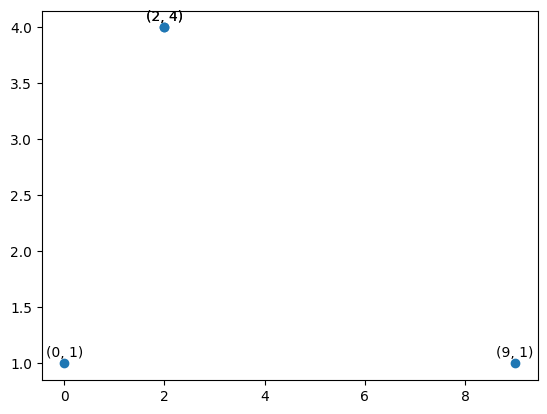

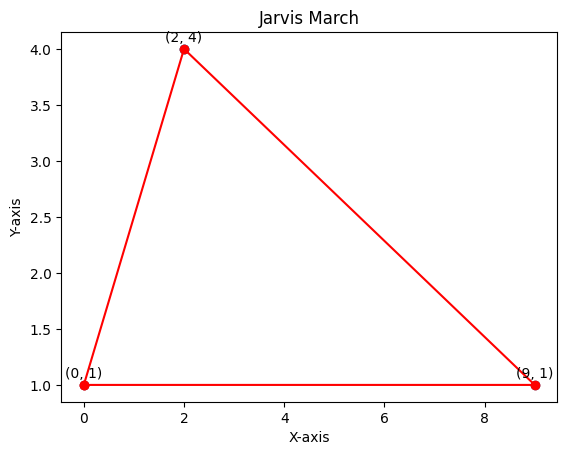

In [ ]:
import matplotlib.pyplot as plt

def plot_graph(points, title):
    x_coords = [point.x for point in points]
    y_coords = [point.y for point in points]
    plt.scatter(x_coords, y_coords, label='All Points', marker='o')

    for i, txt in enumerate(points):
        plt.annotate(f'({txt.x}, {txt.y})', (txt.x, txt.y), textcoords="offset points", xytext=(0, 5), ha='center')
    plt.show()

def plot_hull(hull_indices, points, title):
    x_coords = [point.x for point in points]
    y_coords = [point.y for point in points]
    plt.scatter(x_coords, y_coords, label='All Points', marker='o')
    hull_x_coords = [points[i].x for i in hull_indices]
    hull_y_coords = [points[i].y for i in hull_indices]
    hull_x_coords.append(hull_x_coords[0])  # Connect the last point to the first to close the polygon
    hull_y_coords.append(hull_y_coords[0])

    for i in hull_indices:
        plt.annotate(f'({points[i].x}, {points[i].y})', (points[i].x, points[i].y), textcoords="offset points", xytext=(0, 5), ha='center')

    plt.plot(hull_x_coords, hull_y_coords, label='Convex Hull', marker='o', linestyle='-', color='r')

    # Set axis labels
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')

    # Set the title of the plot
    plt.title(title)

    # Display the plot
    plt.show()


class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

def Left_index(points):
    minn = 0
    for i in range(1, len(points)):
        if points[i].x < points[minn].x:
            minn = i
        elif points[i].x == points[minn].x:
            if points[i].y > points[minn].y:
                minn = i
    return minn

def orientation(p, q, r):
    val = (q.y - p.y) * (r.x - q.x) - (q.x - p.x) * (r.y - q.y)
    if val == 0:
        return 0
    elif val > 0:
        return 1  # Clockwise
    else:
        return 2  # Counterclockwise

def convexHull(points, n):
    if n < 3:
        return []

    l = Left_index(points)
    hull = []
    p = l
    q = 0
    while True:
        hull.append(p)
        q = (p + 1) % n
        for i in range(n):
            plt.plot([points[p].x, points[i].x], [points[p].y, points[i].y], linestyle='-', color='gray', alpha=0.5)
            plot_graph(points, "Jarvis March")  # Plot the graph at each iteration
            plt.pause(0.5)
            if orientation(points[p], points[i], points[q]) == 2:
                q = i
        plt.cla()  # Clear the current axis to remove previous points and lines
        p = q
        if p == l:
            break

    # Return the indices of points in the convex hull
    for each in hull:
        print("(" + str(points[each].x) + "," + str(points[each].y) + ")")

    return hull


def jarvis_march():
    n = int(input("Enter no of points to enter: "))
    points = []
    for i in range(n):
      x = int(input(f"Enter value of x{i + 1}: "))
      y = int(input(f"Enter value of y{i + 1}: "))
      points.append(Point(x, y))
    # points = []
    # points.append(Point(5, 3))
    # points.append(Point(4, 2))
    # points.append(Point(9, 1))
    # points.append(Point(3, 7))
    # points.append(Point(0, 2))
    # points.append(Point(3, 3))
    # points.append(Point(6, 6))
    # points.append(Point(3, 5))
    # points.append(Point(8, 3))
    # points.append(Point(3, 2))
    # points.append(Point(1, 1))

    # Get the indices of points in the convex hull
    hull_indices = convexHull(points, len(points))

    # Plot all points and convex hull
    plot_graph(points, "Jarvis March")
    plot_hull(hull_indices, points, "Jarvis March")
    plt.show()

# Call the function to execute the code
if __name__ == "__main__":
  jarvis_march()

# Graham Scan

Enter no of points to enter: 6
Enter value of x1: 1
Enter value of y1: 2
Enter value of x2: 10
Enter value of y2: 5
Enter value of x3: 3
Enter value of y3: 8
Enter value of x4: 1
Enter value of y4: 2
Enter value of x5: 5
Enter value of y5: 0
Enter value of x6: 1
Enter value of y6: 1


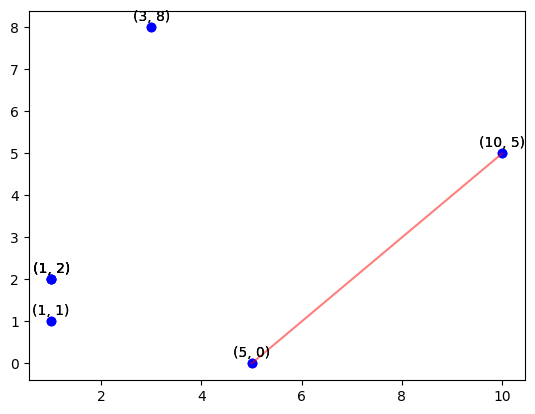

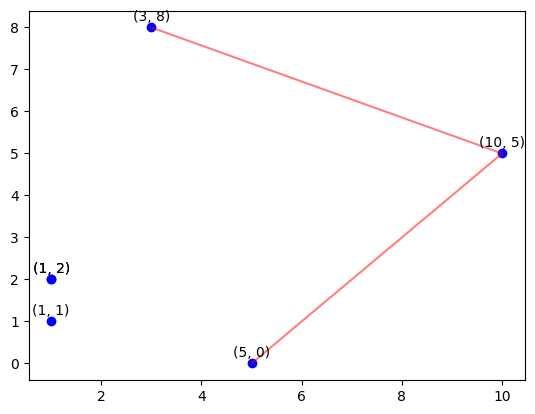

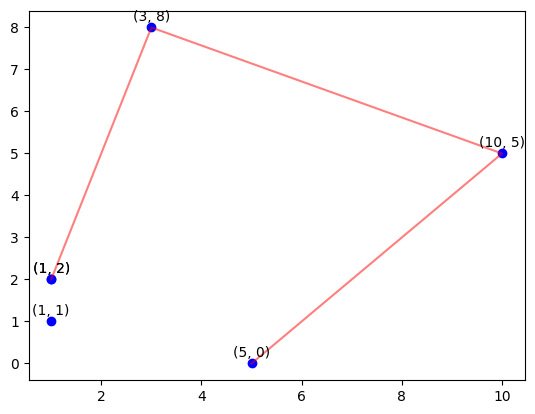

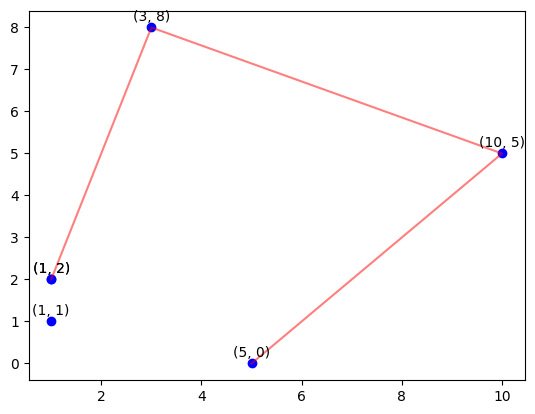

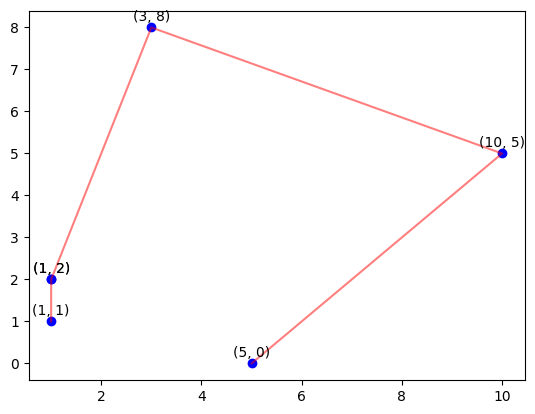

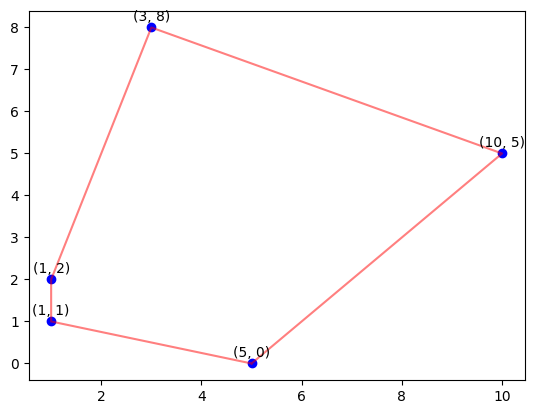

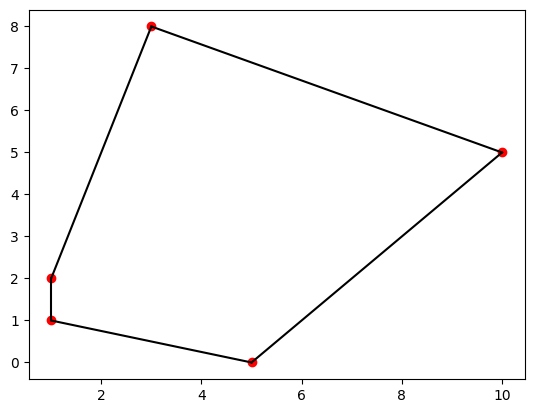

In [ ]:
import random
import math
import matplotlib.pyplot as plt

class Line:
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2

    def draw(self, ax):
        x_values = [self.p1[0], self.p2[0]]
        y_values = [self.p1[1], self.p2[1]]
        ax.plot(x_values, y_values, color='black')

def graham_scan_method(points):
    def polar_angle(point):
        return math.atan2(point[1] - lowest[1], point[0] - lowest[0])

    lowest = min(points, key=lambda p: p[1])
    sorted_points = sorted(points, key=polar_angle)

    # Scatter plot and initial annotations

    hull = [sorted_points[0]]
    for point in sorted_points[1:]:
        x, y = zip(*points)
        plt.plot([h[0] for h in hull] + [point[0]], [h[1] for h in hull] + [point[1]], linestyle='-', color='r', alpha=0.5)
        plt.scatter(x, y, color='blue')
        for i, txt in enumerate(points):
            plt.annotate(f'({txt[0]}, {txt[1]})', (txt[0], txt[1]), textcoords="offset points", xytext=(0, 5), ha='center')
        plt.pause(0.5)  # Add a pause to visualize each iteration
        while len(hull) >= 2 and (point[0] - hull[-1][0]) * (hull[-2][1] - hull[-1][1]) - (point[1] - hull[-1][1]) * (hull[-2][0] - hull[-1][0]) <= 0:
            hull.pop()
        hull.append(point)
    return hull


def graham_scan():
  # Hardcoded list of 20 integer coordinate points
  # point_vector = [
  #   (1, 3), (5, 4), (1, 6), (3, 8),
  #   (2, 2), (7, 5), (9, 1), (4, 7),
  #   (8, 9), (6, 3), (2, 9), (5, 1),
  #   (3, 5), (9, 7), (4, 2), (1, 8),
  #   (7, 2), (6, 9), (8, 4), (10, 10)
  # ]
  n = int(input("Enter no of points to enter: "))
  point_vector = []
  for i in range(n):
    x = int(input(f"Enter value of x{i + 1}: "))
    y = int(input(f"Enter value of y{i + 1}: "))
    point_vector.append((x, y))


  # Create a single subplot for both points and convex hull
  fig, ax = plt.subplots()

  # Scatter the points and plot the convex hull on the same graph
  x, y = zip(*point_vector)
  ax.scatter(x, y, color='blue')
  for i, txt in enumerate(point_vector):
      ax.annotate(f'({txt[0]}, {txt[1]})', (txt[0], txt[1]), textcoords="offset points", xytext=(0, 5), ha='center')

  # Convex hull algorithm
  convex_hull_points = graham_scan_method(point_vector)

  # Draw convex hull points
  x, y = zip(*convex_hull_points)
  plt.plot([h[0] for h in convex_hull_points] + [convex_hull_points[0][0]],
          [h[1] for h in convex_hull_points] + [convex_hull_points[0][1]], linestyle='-', color='r', alpha=0.5)
  plt.scatter(x, y, color='blue')
  for i, txt in enumerate(convex_hull_points):
      plt.annotate(f'({txt[0]}, {txt[1]})', (txt[0], txt[1]), textcoords="offset points", xytext=(0, 5), ha='center')
  plt.pause(0.5)
  for point in convex_hull_points:
      plt.plot(point[0], point[1], 'ro')  # Red dots for convex hull points

  # Draw lines connecting convex hull points
  for i in range(len(convex_hull_points) - 1):
      temp = Line(convex_hull_points[i], convex_hull_points[i + 1])
      temp.draw(plt)

  # Connect the last and first points to close the convex hull
  temp = Line(convex_hull_points[-1], convex_hull_points[0])
  temp.draw(plt)

plt.show()


if __name__ == "__main__":
  graham_scan()

# Monotone

Enter no of points to enter: 6
Enter value of x1: 1
Enter value of y1: 2
Enter value of x2: 5
Enter value of y2: 6
Enter value of x3: 7
Enter value of y3: 2
Enter value of x4: 3
Enter value of y4: 0
Enter value of x5: 1
Enter value of y5: 9
Enter value of x6: 5
Enter value of y6: 5


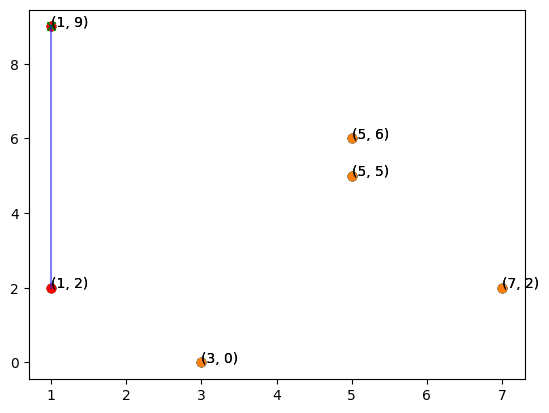

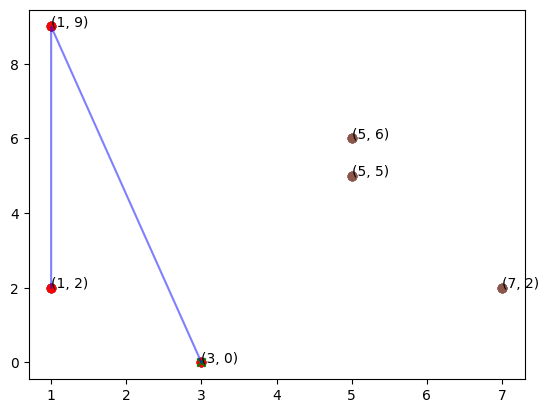

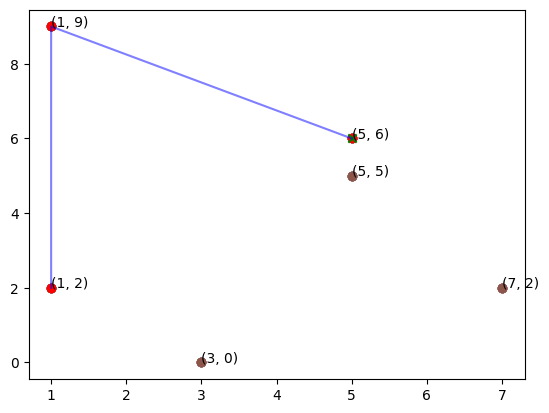

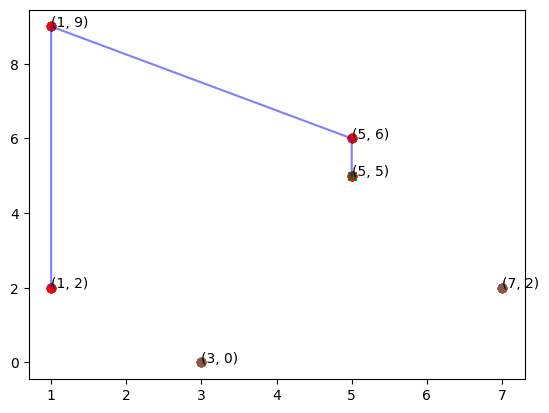

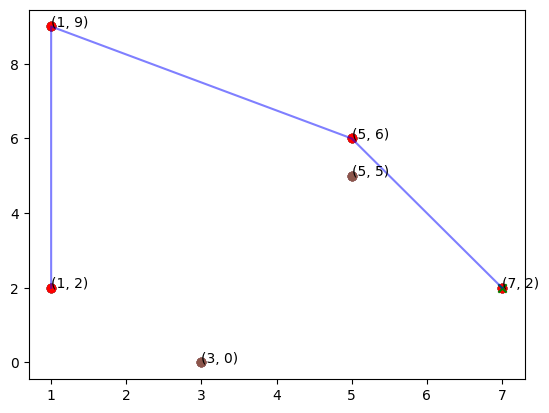

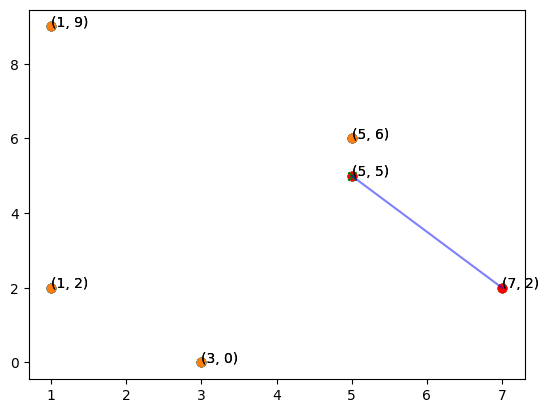

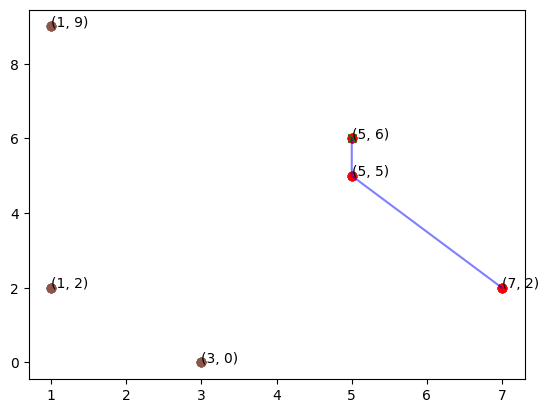

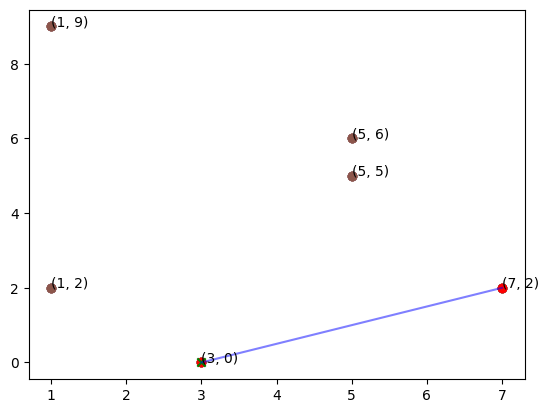

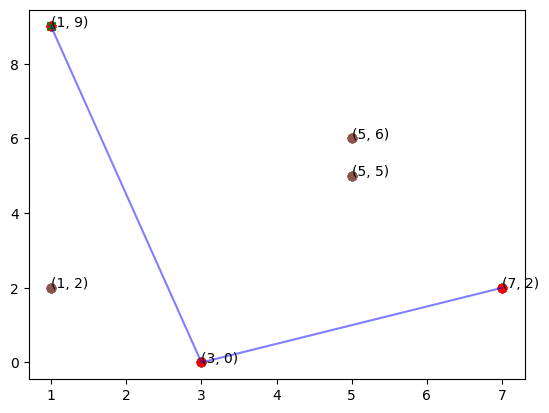

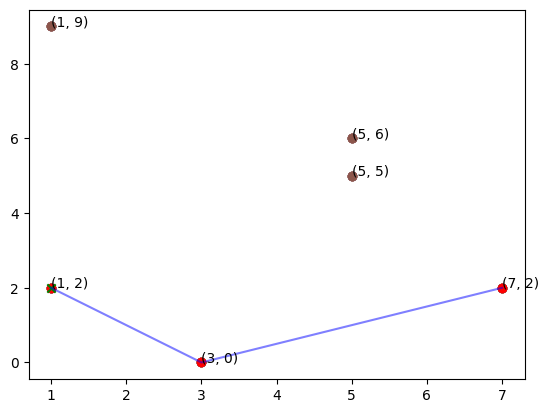

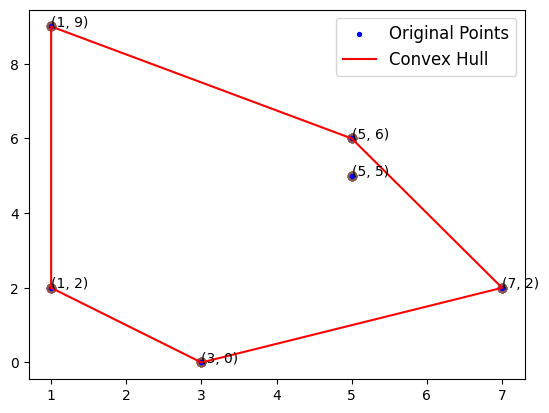

In [ ]:
import random
import matplotlib.pyplot as plt
import os

invalid = lambda p1, p2, p3: ((p2[0] - p1[0]) * (p3[1] - p1[1])) >= ((p2[1] - p1[1]) * (p3[0] - p1[0]))

dist = lambda p1, p2: (((p1[0] - p2[0]) ** 2) + ((p1[1] - p2[1]) ** 2)) ** 0.5

class ConvexH:
    def __init__(self, points):
        self.points = sorted(points, key=lambda x: x[0])
        self.vertex = self.get_hull(self.points) + self.get_hull(self.points[::-1])[1:]
        self.count = len(self.vertex)
        self.area = self.calculate_area()
        self.length = self.calculate_len()

    def get_hull(self, points):
        hull = [points[0]]
        for i in range(len(points)):
          x_coords = [point[0] for point in points]
          y_coords = [point[1] for point in points]
          plt.scatter(x_coords, y_coords, marker='o')

        for j, txt in enumerate(points):
            plt.annotate(f'({txt[0]}, {txt[1]})', (txt[0], txt[1]))

        for i, point in enumerate(points[1:], start=1):
            while len(hull) > 1 and invalid(hull[-2], hull[-1], point):
                hull.pop()
            hull.append(point)
            self.plot_iteration(hull, i,points)

        return hull

    def calculate_area(self):
        sum1 = sum([self.vertex[i][1] * self.vertex[i - 1][0] for i in range(1, self.count)])
        sum2 = sum([self.vertex[i][0] * self.vertex[i - 1][1] for i in range(1, self.count)])
        return abs((sum1 - sum2) / 2)

    def calculate_len(self):
        return sum([dist(self.vertex[i - 1], self.vertex[i]) for i in range(1, self.count)])

    def plot_iteration(self, hull, iteration,points):

        for i in range(len(points)):
          x_coords = [point[0] for point in points]
          y_coords = [point[1] for point in points]
          plt.scatter(x_coords, y_coords, marker='o')

        for j, txt in enumerate(points):
            plt.annotate(f'({txt[0]}, {txt[1]})', (txt[0], txt[1]))

        x_coords = [p[0] for p in hull]
        y_coords = [p[1] for p in hull]
        plt.scatter(x_coords, y_coords, marker='o', color='r')
        plt.plot(x_coords, y_coords, linestyle='-', color='b', alpha=0.5)
        plt.scatter(x_coords[-1], y_coords[-1], marker='x', color='g')

        plt.pause(0.5)
        plt.clf()


    def plot(self,points,size=6):
        org_x = [x for x, y in self.points]
        org_y = [y for x, y in self.points]
        con_x = [x for x, y in self.vertex]
        con_y = [y for x, y in self.vertex]

        for i in range(len(points)):
          x_coords = [point[0] for point in points]
          y_coords = [point[1] for point in points]
          plt.scatter(x_coords, y_coords, marker='o')

        for j, txt in enumerate(points):
            plt.annotate(f'({txt[0]}, {txt[1]})', (txt[0], txt[1]))

        plt.scatter(org_x, org_y, s=size, color='b', label='Original Points')
        plt.plot(con_x, con_y, color='r', label='Convex Hull')
        plt.legend(fontsize=12)
        plt.show()

def monotone():
  # points = [(random.randint(1, 100), random.randint(1, 100)) for _ in range(10)]
  n = int(input("Enter no of points to enter: "))
  points = []
  for i in range(n):
    x = int(input(f"Enter value of x{i + 1}: "))
    y = int(input(f"Enter value of y{i + 1}: "))
    points.append((x, y))

  convex_hull = ConvexH(points)
  convex_hull.plot(points,size=8)

if __name__ == "__main__":
  monotone()


# Counter-Clockwise Method for Line Intersection

Enter coordinates for line 1:
Enter value of x1: 5
Enter value of y1: 1
Enter value of x2: 9
Enter value of y2: 0
Enter coordinates for line 2:
Enter value of x3: 5
Enter value of y3: 2
Enter value of x4: 7
Enter value of y4: 1
Lines do not intersect.


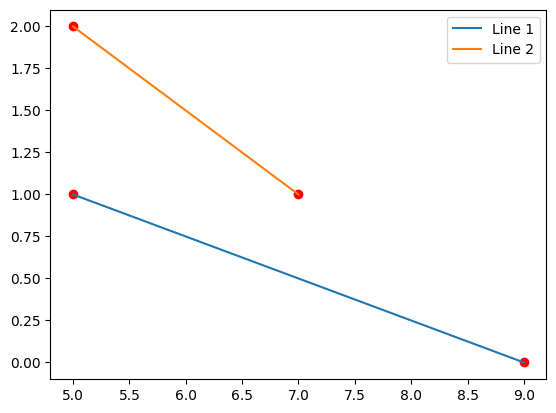

In [ ]:
import matplotlib.pyplot as plt

def ccw(A, B, C):
    return (C[1] - A[1]) * (B[0] - A[0]) > (B[1] - A[1]) * (C[0] - A[0])

def do_intersect(A, B, C, D):
    return ccw(A, C, D) != ccw(B, C, D) and ccw(A, B, C) != ccw(A, B, D)

def plot_lines(A, B, C, D):
    plt.plot([A[0], B[0]], [A[1], B[1]], label='Line 1')
    plt.plot([C[0], D[0]], [C[1], D[1]], label='Line 2')
    plt.scatter([A[0], B[0], C[0], D[0]], [A[1], B[1], C[1], D[1]], color='red')
    plt.legend()
    plt.show()

def counter_clockwise():
    # Hardcoded coordinates for two line segments
    print("Enter coordinates for line 1:")
    x1 = int(input("Enter value of x1: "))
    y1 = int(input("Enter value of y1: "))
    x2 = int(input("Enter value of x2: "))
    y2 = int(input("Enter value of y2: "))

    print("Enter coordinates for line 2:")
    x3 = int(input("Enter value of x3: "))
    y3 = int(input("Enter value of y3: "))
    x4 = int(input("Enter value of x4: "))
    y4 = int(input("Enter value of y4: "))

    line1_point1 = (x1, y1)
    line1_point2 = (x2, y2)
    line2_point1 = (x3, y3)
    line2_point2 = (x4, y4)

    if do_intersect(line1_point1, line1_point2, line2_point1, line2_point2):
        print("Lines intersect.")
        plot_lines(line1_point1, line1_point2, line2_point1, line2_point2)
    else:
        print("Lines do not intersect.")
        plot_lines(line1_point1, line1_point2, line2_point1, line2_point2)

if __name__ == "__main__":
  counter_clockwise()

# Slope Intercept Method for Line Intersection

Enter coordinates for line 1:
Enter value of x1: 8
Enter value of y1: 1
Enter value of x2: 10
Enter value of y2: 4
Enter coordinates for line 2:
Enter value of x3: 5
Enter value of y3: 5
Enter value of x4: 9
Enter value of y4: 9
Lines do not intersect.


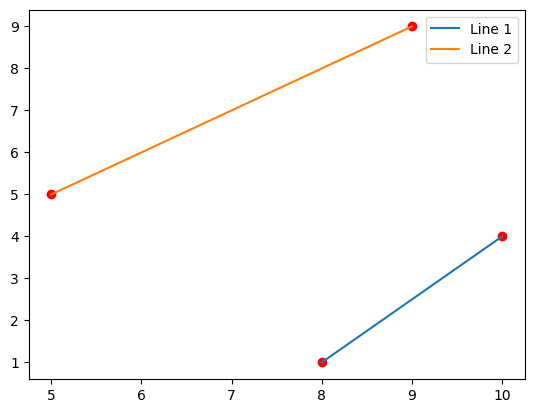

In [ ]:
import matplotlib.pyplot as plt

def get_slope_intercept(x1, y1, x2, y2):
    m = (y2 - y1) / (x2 - x1) if x2 - x1 != 0 else float('inf')  # Handle vertical lines
    c = y1 - m * x1
    return m, c

def do_intersect_slope_intercept(x1, y1, x2, y2, x3, y3, x4, y4):
    m1, c1 = get_slope_intercept(x1, y1, x2, y2)
    m2, c2 = get_slope_intercept(x3, y3, x4, y4)

    if m1 == m2:
        return (min(x1, x2) <= x3 <= max(x1, x2) or min(x1, x2) <= x4 <= max(x1, x2)) and \
               (min(y1, y2) <= y3 <= max(y1, y2) or min(y1, y2) <= y4 <= max(y1, y2))
    else:
        intersection_x = (c2 - c1) / (m1 - m2)
        intersection_y = m1 * intersection_x + c1

        return (min(x1, x2) <= intersection_x <= max(x1, x2) and
                min(y1, y2) <= intersection_y <= max(y1, y2) and
                min(x3, x4) <= intersection_x <= max(x3, x4) and
                min(y3, y4) <= intersection_y <= max(y3, y4))

def plot_lines(x_values, y_values):
    plt.plot(x_values[0], y_values[0], label='Line 1')
    plt.plot(x_values[1], y_values[1], label='Line 2')
    plt.scatter([x_values[0][0], x_values[0][1], x_values[1][0], x_values[1][1]],
                [y_values[0][0], y_values[0][1], y_values[1][0], y_values[1][1]], color='red')
    plt.legend()
    plt.show()

def slope_intercept():
    # Hardcoded coordinates for two line segments
    print("Enter coordinates for line 1:")
    x1 = int(input("Enter value of x1: "))
    y1 = int(input("Enter value of y1: "))
    x2 = int(input("Enter value of x2: "))
    y2 = int(input("Enter value of y2: "))

    print("Enter coordinates for line 2:")
    x3 = int(input("Enter value of x3: "))
    y3 = int(input("Enter value of y3: "))
    x4 = int(input("Enter value of x4: "))
    y4 = int(input("Enter value of y4: "))
    # x1, y1 = 0, 2
    # x2, y2 = 1, 2
    # x3, y3 = 3, 4
    # x4, y4 = 5, 6

    if do_intersect_slope_intercept(x1, y1, x2, y2, x3, y3, x4, y4):
        print("Lines intersect.")
        plot_lines([[x1, x2], [x3, x4]], [[y1, y2], [y3, y4]])
    else:
        print("Lines do not intersect.")
        plot_lines([[x1, x2], [x3, x4]], [[y1, y2], [y3, y4]])

if __name__ == "__main__":
  slope_intercept()

# Area of Triangle Method for Line Intersection

Enter coordinates for line 1:
Enter value of x1: 1
Enter value of y1: 7
Enter value of x2: 9
Enter value of y2: 0
Enter coordinates for line 2:
Enter value of x3: 3
Enter value of y3: 1
Enter value of x4: 5
Enter value of y4: 3
Lines do not intersect.


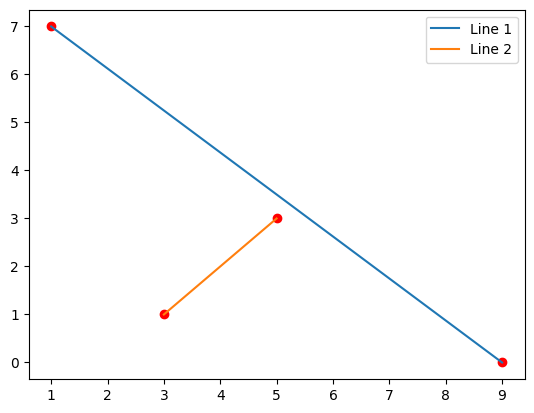

In [ ]:
#Area of Traingle
def calculate_signed_area(x1, y1, x2, y2, x3, y3):
    return 0.5 * ((x2 - x1) * (y3 - y1) - (x3 - x1) * (y2 - y1))

def do_intersect_area_of_triangles(x1, y1, x2, y2, x3, y3, x4, y4):
    area1 = calculate_signed_area(x1, y1, x2, y2, x4, y4)
    area2 = calculate_signed_area(x1, y1, x2, y2, x3, y3)
    area3 = calculate_signed_area(x3, y3, x4, y4, x1, y1)
    area4 = calculate_signed_area(x3, y3, x4, y4, x2, y2)

    return (area1 * area2 < 0) and (area3 * area4 < 0)

def plot_lines(x_values, y_values):
    plt.plot(x_values[0], y_values[0], label='Line 1')
    plt.plot(x_values[1], y_values[1], label='Line 2')
    plt.scatter([x_values[0][0], x_values[0][1], x_values[1][0], x_values[1][1]],
                [y_values[0][0], y_values[0][1], y_values[1][0], y_values[1][1]], color='red')
    plt.legend()
    plt.show()

def aot_main():
    # Hardcoded coordinates for two line segments
    print("Enter coordinates for line 1:")
    x1 = int(input("Enter value of x1: "))
    y1 = int(input("Enter value of y1: "))
    x2 = int(input("Enter value of x2: "))
    y2 = int(input("Enter value of y2: "))

    print("Enter coordinates for line 2:")
    x3 = int(input("Enter value of x3: "))
    y3 = int(input("Enter value of y3: "))
    x4 = int(input("Enter value of x4: "))
    y4 = int(input("Enter value of y4: "))

    # x1, y1 = 0, 2
    # x2, y2 = 1, 2
    # x3, y3 = 3, 4
    # x4, y4 = 5, 6

    if do_intersect_area_of_triangles(x1, y1, x2, y2, x3, y3, x4, y4):
        print("Lines intersect.")
        plot_lines([[x1, x2], [x3, x4]], [[y1, y2], [y3, y4]])
    else:
        print("Lines do not intersect.")
        plot_lines([[x1, x2], [x3, x4]], [[y1, y2], [y3, y4]])

if __name__ == "__main__":
  aot_main()

# Main Code

1. Convex Hull
2. Line Intersection
Enter your choice: 2
1. Counter-clockwise Method
2. Slope-intercept Method
3. Area of Triangle Method
Enter your choice: 1
Enter coordinates for line 1:
Enter value of x1: 4
Enter value of y1: 1
Enter value of x2: 6
Enter value of y2: 1
Enter coordinates for line 2:
Enter value of x3: 7
Enter value of y3: 4
Enter value of x4: 8
Enter value of y4: 2
Lines do not intersect.


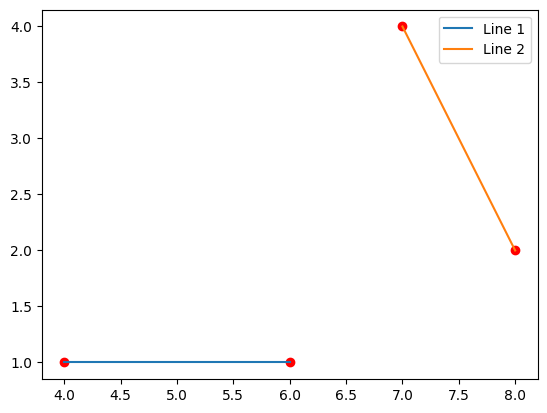

In [ ]:
print("1. Convex Hull")
print("2. Line Intersection")
opt1 = int(input("Enter your choice: "))

if opt1 == 1:
  print("1. Jarvis March")
  print("2. Graham Scan")
  print("3. Quick Hull")
  print("4. Brute Force")
  print("5. Monotone")
  opt2 = int(input("Enter your choice: "))

  if opt2 == 1:
    jarvis_march()
  elif opt2 == 2:
    graham_scan()
  elif opt2 == 3:
    call_quick_hull()
    pass
  elif opt2 == 4:
    brute_force()
    pass
  elif opt2 == 5:
    monotone()
    pass

  else:
    pass

elif opt1 == 2:
  print("1. Counter-clockwise Method")
  print("2. Slope-intercept Method")
  print("3. Area of Triangle Method")
  opt2 = int(input("Enter your choice: "))

  if opt2 == 1:
    counter_clockwise()
  elif opt2 == 2:
    slope_intercept()
  elif opt2 == 3:
    aot_main()
  else:
    pass

else:
  pass